In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn-darkgrid")

In [20]:
import pickle


with open('some-file.pkl', 'rb') as f:
    data = pickle.load(f)

    
# with open('test/test.pkl', 'rb') as f:
#     data = pickle.load(f)
    
print(data)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ConvNN(
    (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
    (dropout1): Dropout(p=0.25, inplace=False)
    (dropout2): Dropout(p=0.5, inplace=False)
    (fc1): Linear(in_features=3872, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=26, bias=True)
  ),
)


## Validation accuracy performance of active learning on ASL

In [2]:
#validation performance of ASL ACTIVE LEARNING
data_bald = np.load("ASL_val_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("ASL_val_result_npy/max_entropy-MC_dropout=True.npy")
data_mean_std = np.load("ASL_val_result_npy/mean_std-MC_dropout=True.npy")
data_uniform = np.load("ASL_val_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("ASL_val_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std,"uniform": data_uniform, "var_ratios": data_var_ratios}

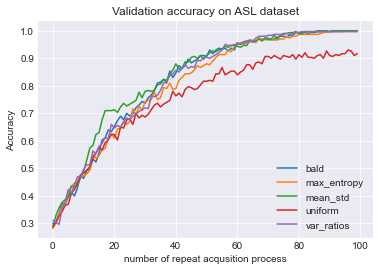

In [3]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Validation accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.show()

## Validation accuracy performance of bsl active learning

In [4]:
#validation performance of ACTIVE LEARNING on BSL dataset
data_bald = np.load("BSL_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("BSL_result_npy/max_entropy-MC_dropout=True.npy")
#data_mean_std = np.load("result_npy_BSL/mean_std-MC_dropout=True.npy")
data_uniform = np.load("BSL_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("BSL_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

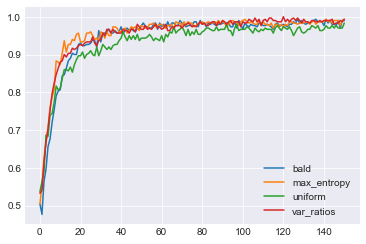

In [5]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

## Sample new dataset with weight from ASL

Text(0.5, 0, 'alphabet')

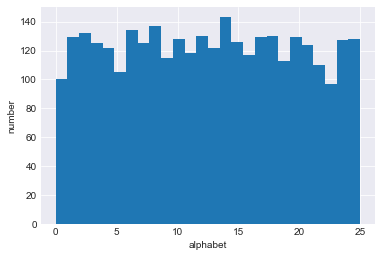

In [5]:
#have a look at the dataset
ds_train = pd.read_csv("D:/AI_thesis/Sign_dataset/sign_ISL_train.csv") 
ds_test = pd.read_csv("D:/AI_thesis/Sign_dataset/sign_ISL_test.csv") 
ds_train
ds_test["label"].hist(bins=26)
plt.ylabel("number")
plt.xlabel("alphabet")

In [8]:
freq= {"E":0.111,"A":0.085,"R":0.076,"I":0.075,"O":0.071,"T":0.070,"N":0.067,"S":0.057,"L":0.055,"C":0.045,"U":0.036,"D":0.034,"P":0.032,
    "M":0.030,"H":0.030,"G":0.025,"B":0.021,"F":0.018,"Y":0.018,"W":0.013,"K":0.011,"V":0.010,"X":0.003,"J":0.002,"Q":0.002, "Z":0.003}
Alphabet_list=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

from collections import defaultdict
new_freq = defaultdict(float)
for i in Alphabet_list:
    index = Alphabet_list.index(i)
    freq[str(index)] = freq[i]
    del freq[i]   
#del freq['9']

weight=[]
for index, row in ds_train.iterrows():
    weight.append(freq[str(row['label'])])
ser = pd.Series(data=weight)

In [9]:
weight_sampleed_train= ds_train.sample(frac=1, replace=True, weights=ser, random_state=1)
unweight_sampleed_train = ds_train.sample(frac=1, replace=True, weights=None, random_state=1)
unweight_sampleed_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
235,1,5,5,5,7,7,5,5,6,5,...,5,6,5,6,6,6,6,5,6,10
12172,23,1,1,2,2,3,2,2,2,3,...,5,5,5,5,5,5,5,5,5,10
5192,4,17,19,19,20,20,18,18,18,19,...,18,18,18,19,19,20,20,20,20,24
17289,0,14,13,15,16,17,18,16,16,18,...,11,12,12,13,13,13,13,12,11,21
10955,6,16,17,15,15,17,16,16,16,14,...,14,14,14,14,15,15,15,15,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19179,14,109,121,130,135,140,144,148,149,151,...,93,137,136,136,135,134,133,132,128,118
16165,20,10,12,12,14,18,17,15,17,15,...,14,14,15,14,14,15,14,14,16,21
15844,19,22,8,7,7,6,8,12,12,9,...,96,107,109,14,11,10,10,10,10,14
18537,19,5,9,7,7,6,9,13,12,9,...,107,98,14,13,15,14,14,14,14,17


In [11]:
#sampleed_train["label"].hist(bins=25, density=True)
#plt.ylabel("relative frequency")
#plt.xlabel("alphabets")
weight_sampleed_train.to_csv(path_or_buf="sign_dataset/sampled_sign_ISL_train.csv", index=False)
#sampleed_train = pd.read_csv("sign_dataset/sampled_sign_mnist_train.csv")

unweight_sampleed_train.to_csv(path_or_buf="sign_dataset/unwei_sampled_ISL.csv", index=False)
#sampleed_train = pd.read_csv("sign_dataset/sampled_sign_mnist_train.csv")

## validation performance of MNIST ACTIVE LEARNING

In [26]:
#validation performance of MNIST ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueMNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueMNIST.npy")
#data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueMNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueMNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueMNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

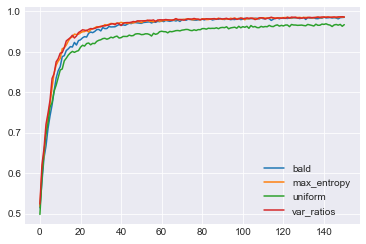

In [27]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

In [54]:
#Test performance of ASL ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueASL_MNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueASL_MNIST.npy")
data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueASL_MNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueASL_MNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueASL_MNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        "mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

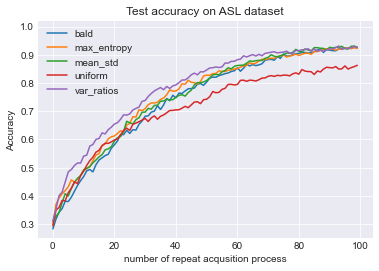

In [62]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Test accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.ylim([0.25,1.02])
plt.show()

## VISUALIZE the confusion matrix imbalanced 0.4*1

In [5]:
#Confusion matrix for 0.4 weighted 
con_bald = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_bald.csv", delimiter=',')
con_max_entropy = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_max_entropy.csv", delimiter=',')
con_mean_std = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_mean_std.csv", delimiter=',')
con_uniform = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_uniform.csv", delimiter=',')
con_var_ratios = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_var_ratios.csv", delimiter=',')

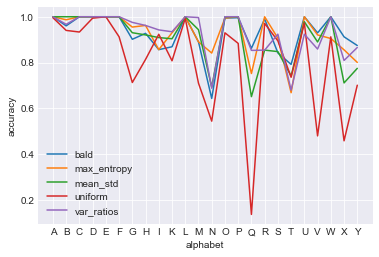

In [6]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =con_bald.diagonal()/con_bald.sum(axis=1)
accuracy_max_entropy =con_max_entropy.diagonal()/con_bald.sum(axis=1)
accuracy_mean_std =con_mean_std.diagonal()/con_bald.sum(axis=1)
accuracy_uniform =con_uniform.diagonal()/con_bald.sum(axis=1)
accuracy_var_ratios =con_var_ratios.diagonal()/con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the imbalanced confusion matrix 1

In [22]:
#Confusion matrix for 1 weighted 
full_con_bald = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_bald_.csv", delimiter=',')
full_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_max_max_entropy.csv", delimiter=',')
full_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_mean_std.csv", delimiter=',')
full_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_uniform.csv", delimiter=',')
full_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_var_ratios.csv", delimiter=',')

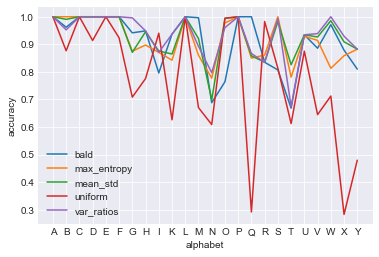

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_con_bald.diagonal()/full_con_bald.sum(axis=1)
accuracy_max_entropy =full_con_max_entropy.diagonal()/full_con_bald.sum(axis=1)
accuracy_mean_std =full_con_mean_std.diagonal()/full_con_bald.sum(axis=1)
accuracy_uniform =full_con_uniform.diagonal()/full_con_bald.sum(axis=1)
accuracy_var_ratios =full_con_var_ratios.diagonal()/full_con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the balanced confusion matrix 1

In [24]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_bald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_max_entropy.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_mean_std.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_uniform.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_var_ratios.csv", delimiter=',')

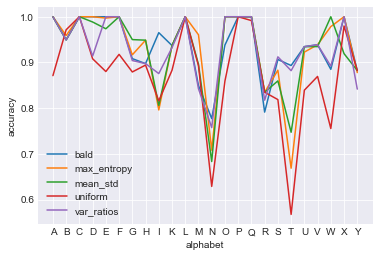

In [25]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## Visualize the weighted GSL result 

In [22]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matbald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmean.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matvar_.csv", delimiter=',')

sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))

0.6110414052697616

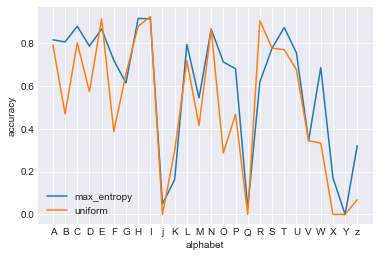

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
#accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
GSL_laccuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
#accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
#accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)
#ax.plot([i for i in range(26)], accuracy_bald, label="bald")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="max_entropy")
#ax.plot([i for i in range(26)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="uniform")
#ax.plot([i for i in range(26)], accuracy_var_ratios, label="var_ratios")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Visualize the weighted ASL + GSL train together(same conv and classifier) result 

In [21]:
#Confusion matrix for 1 unweighted 
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))


0.699289000418235

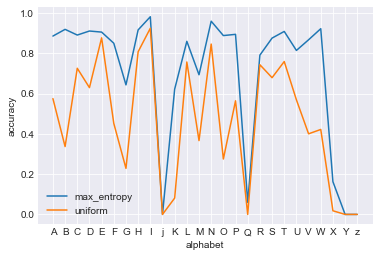

In [11]:
A_GSL_accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
A_GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Comparsion of ASL and GSL

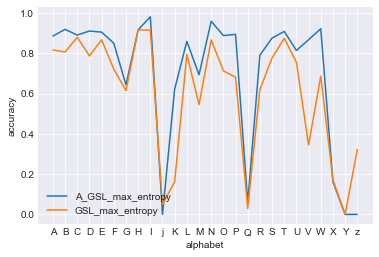

In [25]:
figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="A_GSL_max_entropy")
#ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="A_GSL_uniform")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="GSL_max_entropy")
#ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="GSL_uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend(loc=3)